---
# 1) Resumo

Neste notebook iremos fazer um seleção mais fina das variaveis explicativas da [base limpa](https://github.com/HenriqueCCdA/BC_DS_Projeto_Final/blob/10acc58f00f060385488c782c9ae2d2e6d404c08/Dados/Tratados/dados_tratados_por_paciente.csv). A base limpa foi criada através deste [Notebook](https://github.com/HenriqueCCdA/BC_DS_Projeto_Final/blob/10acc58f00f060385488c782c9ae2d2e6d404c08/Notebooks/Exploratorios/explaracao_limpezada.ipynb). 

Aqui será usada o **sklearn**. Primeira a colunas com correlação de acima de 0.9 serão retiradas igual (notebook anterior)[(https://github.com/HenriqueCCdA/BC_DS_Projeto_Final/blob/main/Notebooks/Selecao_variaveis/selecao_variaveis.ipynb)]. Após isso foi utlizado O recursive feature elimination (RFE) do **sklearn**
 
O limite de correlação utilizado foi de **0.9**. Duas seleções de variaveis foram feitas, umas com 20 variaveis e outra com 30. O modelo usado para fazer foi a **LogisticRegression**.   

---
# 2) Pre-analise

## 2.1) Importando libs

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
#
from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence
#
pd.set_option('display.max_rows', 50)

## 2.2) Minhas Funções

In [49]:
import sys
sys.path.insert(1, "../../")
from src.info import dimensao_dados, variaveis_explicativas, mostra_todas_as_colunas_com,escreve_somente_as_colunas
from src.plota_graficos import plota_matriz_correlacao
from src.ml import retorna_x_y, cv_val_split
from src.selecao_vars import remove_corr_valor_de_corte

---
# 3) Selecionando os dados

## 3.1) Importando os dados

In [3]:
path = "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/Dados/Tratados/dados_tratados_por_paciente.csv"
path = "../../Dados/Tratados/dados_tratados_por_paciente.csv"
dados = pd.read_csv(path)
dados.head(n=5)

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,ICU
0,1,0.111111,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
1,0,-1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.515528,-0.351328,-0.756272,-1.000000,1
2,0,-0.333333,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
3,0,-1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-0.877301,-0.923664,-0.882353,-0.952381,-1.000000,-0.883669,-0.870968,-0.953536,0
4,0,-1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.826087,-0.754601,-0.984733,-1.000000,-0.976190,-0.860870,-0.714460,-1.000000,-0.975891,0


## 3.2) Analizando os dados

### Dimensação da matriz atual

In [4]:
dimensao_dados(dados)

Numero de linhas : 351 
Numero de colunas: 121 


### Possiveis variaveis explicativas da base de dados

In [5]:
_ = variaveis_explicativas(dados)

 col[  0] -> AGE_ABOVE65                         col[  1] -> AGE_PERCENTIL                       
 col[  2] -> GENDER                              col[  3] -> DISEASE GROUPING 1                  
 col[  4] -> DISEASE GROUPING 2                  col[  5] -> DISEASE GROUPING 3                  
 col[  6] -> DISEASE GROUPING 4                  col[  7] -> DISEASE GROUPING 5                  
 col[  8] -> DISEASE GROUPING 6                  col[  9] -> HTN                                 
 col[ 10] -> IMMUNOCOMPROMISED                   col[ 11] -> OTHER                               
 col[ 12] -> ALBUMIN_MEDIAN                      col[ 13] -> ALBUMIN_MEAN                        
 col[ 14] -> ALBUMIN_MIN                         col[ 15] -> ALBUMIN_MAX                         
 col[ 16] -> BE_VENOUS_MEDIAN                    col[ 17] -> BE_VENOUS_MEAN                      
 col[ 18] -> BE_VENOUS_MIN                       col[ 19] -> BE_VENOUS_MAX                       
 col[ 20] -> BLAST_M

## 3.3)  Matriz de Correlação

### Matriz de correlação com correlações sem tratamento

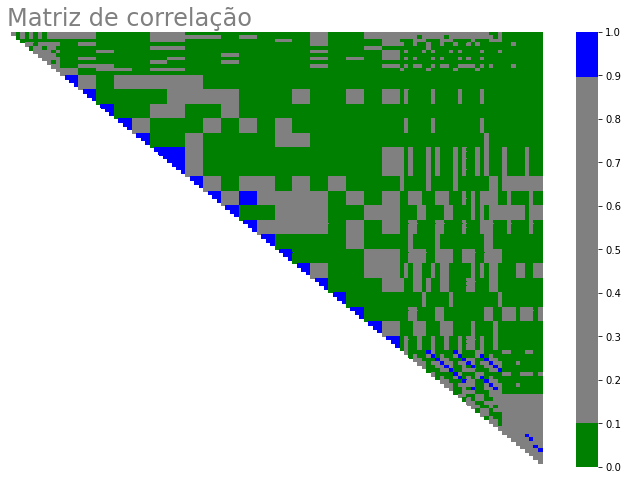

In [6]:
plota_matriz_correlacao(dados, matriz='upper')

> **Fig 3.1)** Heatmap das correlações dos dados limpos originais. A cor **azul** são valores entre **[0.9 e 1.0]**. A cor **cinza** são valores entre **[0.1 e 0.8]**. A cor verde são valores entre **[0 e 0.1]**..

### Selecionando as variaveis explicativas com RFE

**Eu estou chamando o cv_val_split aqui para evitar data leakage no dataset train-test. Esta solução aqui não é melhor é precisa ser repensada!**

> Qual é o problema ? Eu divi a base de dados em duas, cross validadation (CV) e validadação, caso eu use a base toda aqui para selecionar as variaveis eu estaria usando informações do dataset de validação. Para contornar eu problema eu estou divindido a base é usando apenas as informação do dataset CV para selecionar os dados. Uma solução mais elegante seria botar o RFE dentro do pipeline.


In [7]:
seed     = 1471523
rng = RandomState(MT19937(SeedSequence(seed)))

In [39]:
def selecao_pelo_RFE(modelo, dados, p_val=0.1, n_features_to_select=60, rng=None):

    x_cv, _, y_cv, _ = cv_val_split(dados, p_val=p_val, rng=rng)
    
    rfe = RFE(modelo, n_features_to_select=n_features_to_select)

    selec = rfe.fit(x_cv, y_cv)

    # Mostrando o número de features:
    print(f'Número de features: {selec.n_features_}')  

    cols = selec.get_support(indices=True)
    dados_rfe = dados.iloc[:,cols]
    return  pd.concat([ dados_rfe, dados.loc[:,'ICU']], axis=1)

In [71]:
modelo = LogisticRegression(max_iter=2000)
#modelo = GradientBoostingClassifier()

dados_rfe30 = selecao_pelo_RFE(modelo=modelo, dados=dados, p_val=0.1, n_features_to_select=30, rng=rng) 
dados_rfe20 = selecao_pelo_RFE(modelo=modelo, dados=dados, p_val=0.1, n_features_to_select=20, rng=rng) 

Número de features: 30
Número de features: 20
Número de features: 10


In [72]:
dados_rfe30

,AGE_PERCENTIL,BE_VENOUS_MEDIAN,GGT_MEDIAN,HEMATOCRITE_MEAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,LACTATE_MAX,LEUKOCYTES_MIN,LINFOCITOS_MEAN,LINFOCITOS_MIN,...,BLOODPRESSURE_DIASTOLIC_MEDIAN,RESPIRATORY_RATE_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,BLOODPRESSURE_DIASTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,ICU
0,0.111111,-1.000000,-0.945093,0.090147,0.109756,0.109756,1.000000,-0.835844,-0.914938,-0.914938,...,0.086420,-0.586207,0.237113,-0.500000,0.208791,-0.247863,-0.432836,-0.636364,-0.420290,1
1,-1.000000,-1.000000,-0.958528,0.144654,0.158537,0.158537,1.000000,-0.382773,-0.908714,-0.908714,...,-0.506173,-0.517241,-0.525773,-0.714286,0.604396,-0.435897,0.000000,-0.575758,0.101449,1
2,-0.333333,-1.000000,-0.316589,-0.203354,-0.219512,-0.219512,-0.828421,-0.729239,-0.836100,-0.836100,...,0.012346,-0.448276,0.175258,-0.357143,0.208791,-0.299145,-0.626866,-0.515152,-0.420290,0
3,-1.000000,-1.000000,-0.938084,0.358491,0.304878,0.304878,1.000000,-0.702202,-0.641079,-0.641079,...,0.333333,-0.586207,0.443299,-0.571429,0.538462,-0.076923,-0.044776,-0.575758,0.072464,0
4,-1.000000,-1.000000,-0.958528,0.291405,0.243902,0.243902,1.000000,-0.706450,-0.340249,-0.340249,...,-0.037037,-0.517241,0.030928,-0.428571,0.252747,-0.247863,-0.626866,-0.575758,-0.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,-0.333333,-1.000000,-0.147196,-0.253669,-0.195122,-0.195122,1.000000,-0.704519,-0.879668,-0.879668,...,-0.160494,-0.448276,0.030928,-0.357143,0.472527,-0.418803,0.059701,-0.515152,-0.072464,1
347,1.000000,-1.000000,-0.958528,-0.241090,-0.292683,-0.292683,1.000000,-0.794129,-0.921162,-0.921162,...,-0.407407,-0.448276,-0.175258,-0.357143,0.230769,-0.589744,-0.432836,-0.515152,0.072464,0
348,-0.111111,-1.000000,-0.958528,0.064990,0.048780,0.048780,1.000000,-0.718038,-0.838174,-0.838174,...,0.012346,-0.448276,0.175258,-0.357143,0.340659,-0.299145,-0.462687,-0.515152,-0.246377,1
349,-0.333333,-1.000000,-0.958528,-0.069182,-0.085366,-0.085366,1.000000,-0.877559,-0.819502,-0.819502,...,0.086420,-0.655172,0.237113,-0.571429,0.318681,-0.247863,-0.447761,-0.696970,-0.275362,0


### Matriz de correlação par os dados selecionados pelo RFE

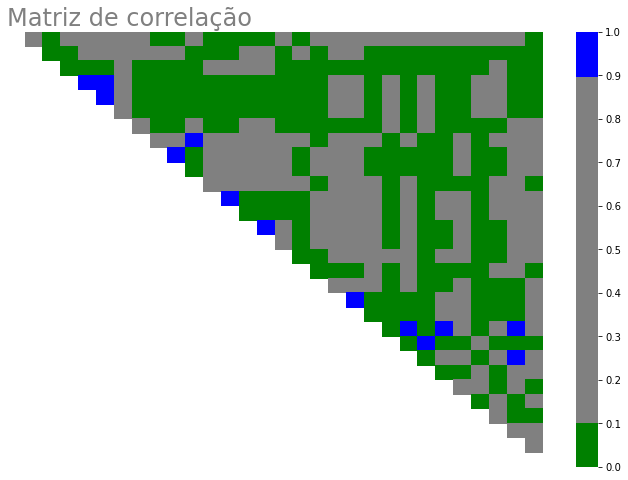

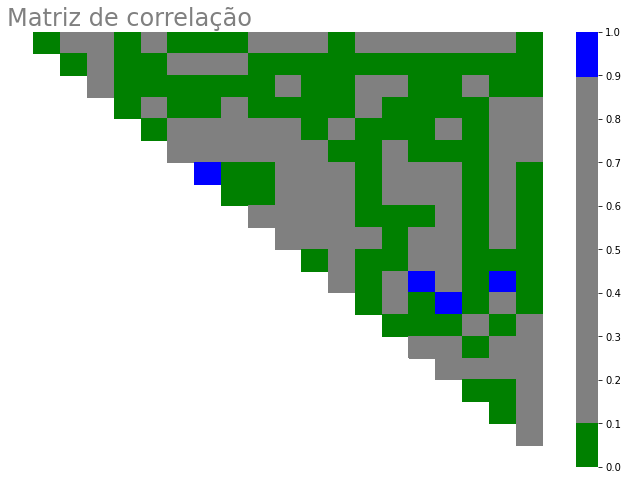

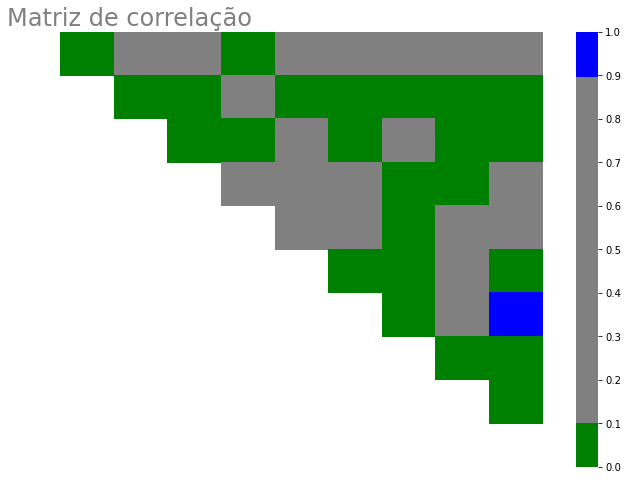

In [73]:
plota_matriz_correlacao(dados_rfe30, matriz='upper')
plota_matriz_correlacao(dados_rfe20, matriz='upper')

> > **Fig 3.2)** Pode-se observar que aplicar diretamente RFE não retirou a variaveis com alta correlação.

* Aplicando primeiro a remoção das variaces com alta correlação e depois o RFE

In [74]:
dados_sem_corr_acima_do_valor_de_corte, colunas_exluidas = remove_corr_valor_de_corte(dados, 0.90)
print(f'{len(colunas_exluidas)} a coluna exluidas foram')

79 a coluna exluidas foram


In [76]:
modelo = LogisticRegression(max_iter=2000)  
dados_rfe30 = selecao_pelo_RFE(modelo=modelo, dados=dados_sem_corr_acima_do_valor_de_corte, p_val=0.1, n_features_to_select=30, rng=rng) 
dados_rfe20 = selecao_pelo_RFE(modelo=modelo, dados=dados_sem_corr_acima_do_valor_de_corte, p_val=0.1, n_features_to_select=20, rng=rng) 

Número de features: 30
Número de features: 20
Número de features: 10


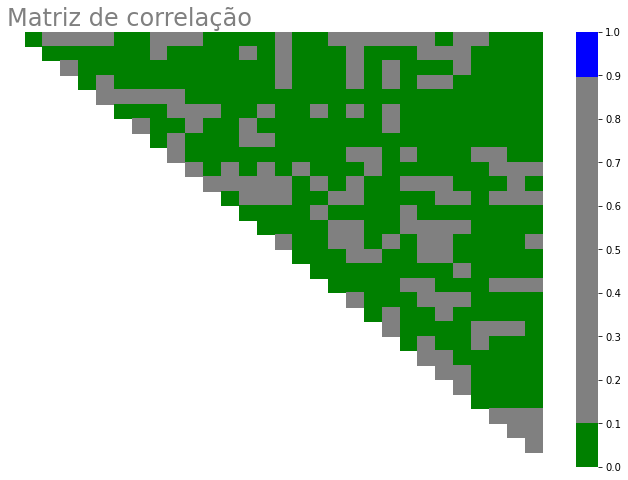

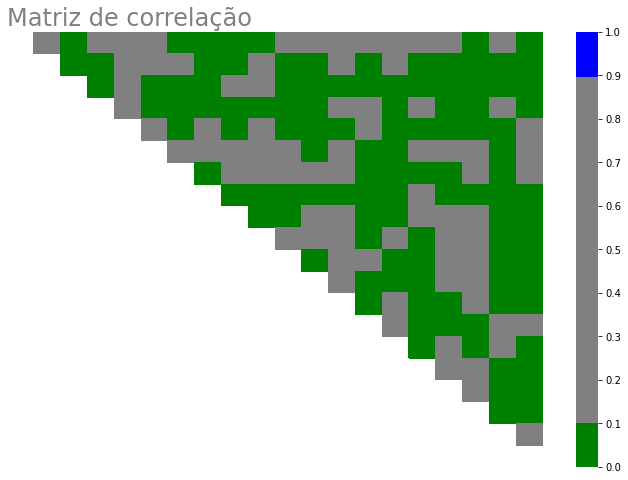

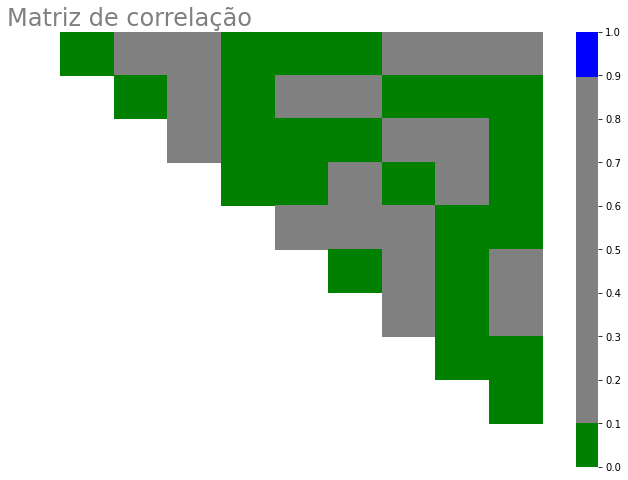

In [77]:
plota_matriz_correlacao(dados_rfe30, matriz='upper')
plota_matriz_correlacao(dados_rfe20, matriz='upper')

> **Fig 3.3)** Pode-se observar agora que não temos mais correlações acima **0.9**.

# 4) Salvando os dados

In [78]:
path_out = '../../Dados/Tratados/'
dados_rfe30.to_csv(path_out+'dados_rfe30.csv', index_label=False)
dados_rfe20.to_csv(path_out+'dados_rfe20.csv', index_label=False)

In [79]:
escreve_somente_as_colunas(dados_rfe30,path_out+'dados_rfe30_colunas.csv')
escreve_somente_as_colunas(dados_rfe20,path_out+'dados_rfe20_colunas.csv')

---
Navegação:

---

[Voltar para o Notebook anterior (Seleção de variaveis explicativas pela matriz correlação)](https://github.com/HenriqueCCdA/BC_DS_Projeto_Final/blob/main/Notebooks/Selecao_variaveis/selecao_variaveis.ipynb)

[Ir para o proximo notebook (Seleção de variaveis explicativas pelo featurewiz)](https://github.com/HenriqueCCdA/BC_DS_Projeto_Final/blob/10acc58f00f060385488c782c9ae2d2e6d404c08/Notebooks/Selecao_variaveis/selecao_variaveis_featurewiz.ipynb)

---

[Retornar para README principal](https://github.com/HenriqueCCdA/BC_DS_Projeto_Final)

---